In [ ]:
pip install ludwig pyyaml ptitprince pandas

In [9]:
import pandas as pd
df = pd.read_csv("insurance_claim_status.csv")
df.head()

,age,agency,agency_type,commision_value,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


In [10]:
from ludwig.api import LudwigModel
model = LudwigModel(config="model_definition.yaml")
model.train(dataset=df)


TrainingResults(train_stats=TrainingStats(training={'claim': {'loss': [19.94222640991211, 2.877948760986328, 1.4020744562149048, 0.34235742688179016, 0.17496873438358307], 'mean_absolute_error': [3.5154454708099365, 1.5510121583938599, 1.032976746559143, 0.4754467308521271, 0.3274487853050232], 'mean_absolute_percentage_error': [2343379.25, 994299.25, 775439.1875, 225564.1875, 161466.265625], 'mean_squared_error': [19.942232131958008, 2.877948760986328, 1.4020743370056152, 0.34235742688179016, 0.17496874928474426], 'r2': [-119.20633697509766, -16.347490310668945, -7.451321601867676, -1.0636372566223145, -0.054663896560668945], 'root_mean_squared_error': [4.465672492980957, 1.6964517831802368, 1.1840921640396118, 0.5851131677627563, 0.41829267144203186], 'root_mean_squared_percentage_error': [30202.484375, 12727.1171875, 9931.6083984375, 3167.040771484375, 2548.467041015625]}, 'combined': {'loss': [18.7078857421875, 2.790613889694214, 1.3132187128067017, 0.33006012439727783, 0.182130694

In [11]:
predictions, _ = model.predict(dataset='insurance_claim_status.csv')
predictions.head()


,claim_predictions
0,0.544479
1,0.417529
2,0.269640
3,0.230949
4,0.373456


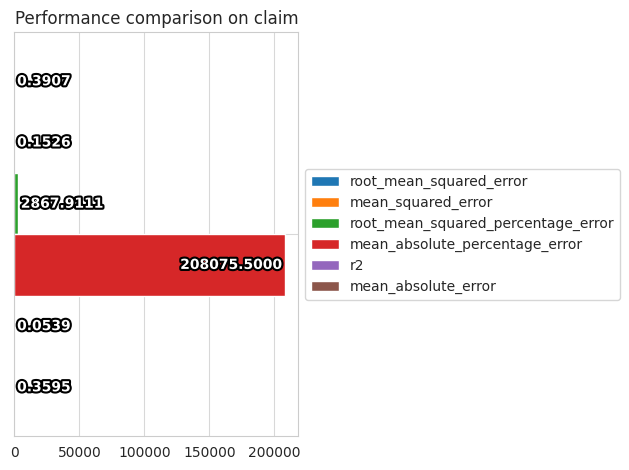

In [12]:
from ludwig.visualize import compare_performance
eval_stats, _, _ = model.evaluate(dataset='insurance_claim_status.csv')
compare_performance([eval_stats])
